In [23]:
#Regression lineaire multivariée 

import pandas as pd
import numpy as np

df = pd.read_csv('data1.csv', header = None)
df.head()

df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

X = df.drop(columns=2)
y = df.iloc[:, 3]

for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])
X.head()

theta = np.array([0]*len(X.columns))

m = len(df)

#les fonction demander : 

def CalculHypothese(theta, X):
    return theta*X

def FonctionDeCout(X, y, theta):
    y1 = CalculHypothese(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

def DescenteGradient(X, y, theta, alpha, i):
    J = []  
    k = 0
    while k < i:        
        y1 = CalculHypothese(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = FonctionDeCout(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

#Apres mes analyse le meilleux que j'ai eu avec 50 iteration etait celui avec 0.001 de taux


J, j, theta = DescenteGradient(X, y, theta, 0.001, 1500)

In [24]:
y_hat = CalculHypothese(theta, X)
y_hat = np.sum(y_hat, axis=1)

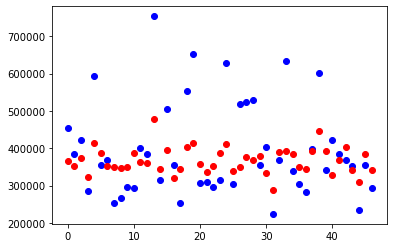

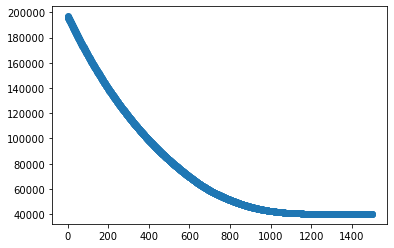

In [28]:
#Question 5 : affichage la courbe de cout en fonction des 1500 iteration demander 

plt.figure()
plt.scatter(x=list(range(0, 1500)), y=J)
plt.show()

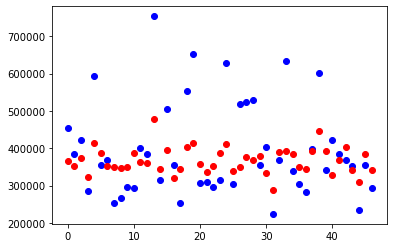

In [29]:
# les meilleures parametre de theta

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 47)),y= y, color='blue')         
plt.scatter(x=list(range(0, 47)), y=y_hat, color='red')
plt.show()

In [ ]:
#Regression avancé #2

#Régression par forêts aléatoires

Rg1 = RandomForestRegressor(n_estimators= 100, random_state=None)

#Nous allons entrainner notre modèle.

Rg1.fit(x_train,y_train)

#Prédiction en fonction de nos données d'entrainement.

y_prediction = Rg1.predict(x_test)

#resultat des données de test et d'entrainement.

resultat_1 = Rg_1.score(x_test, y_test)
resultat_2 = Rg_1.score(x_train, y_train)

#Entrainement de notre modèle

rg_2 = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(x_train, y_train)
y_prediction_2 = rg_2.predict(x_test)
resultat_3 = rg_2.score(x_test, y_test)
resultat_4 = rg_2.score(x_train, y_train)

#References :

#https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#examples-using-sklearn-ensemble-randomforestregressor
#https://youtu.be/tHxTyPEgQvg